In [98]:
import numpy as np
import scipy as sp
import pandas as pd
from glob import glob
from IPython.display import display
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
from scipy import signal


**Data cleaning and understanding**

Reading the EEG data from the provided four electrodes by running the file collected during the long blink session equally long (510 points pro session). Conduct the preliminary data processing and visualization steps to gain some insight from the EEG recording:
- Splits and clean the data
- Selects the first 510 points for visualization

1. Are the amplitude value measure as microvolt? This information was not given
2. Are the index time series? If yes issit in seconds or milliseconds? Sampling frequency is 215 Hz at 2 seconds
3. What does 510 points pro session mean? It is an arbitrary decision from the data manager
4. Do we need more information about the four electrodes? No further knowledge is required

**Step 1 Data cleaning and understanding**

1.1 Load data, and parsing it from string to appropriate data type
1.2 Select the first 510 points for visualization

Text(0.5, 1.0, 'The first 510 points of Long Blink')

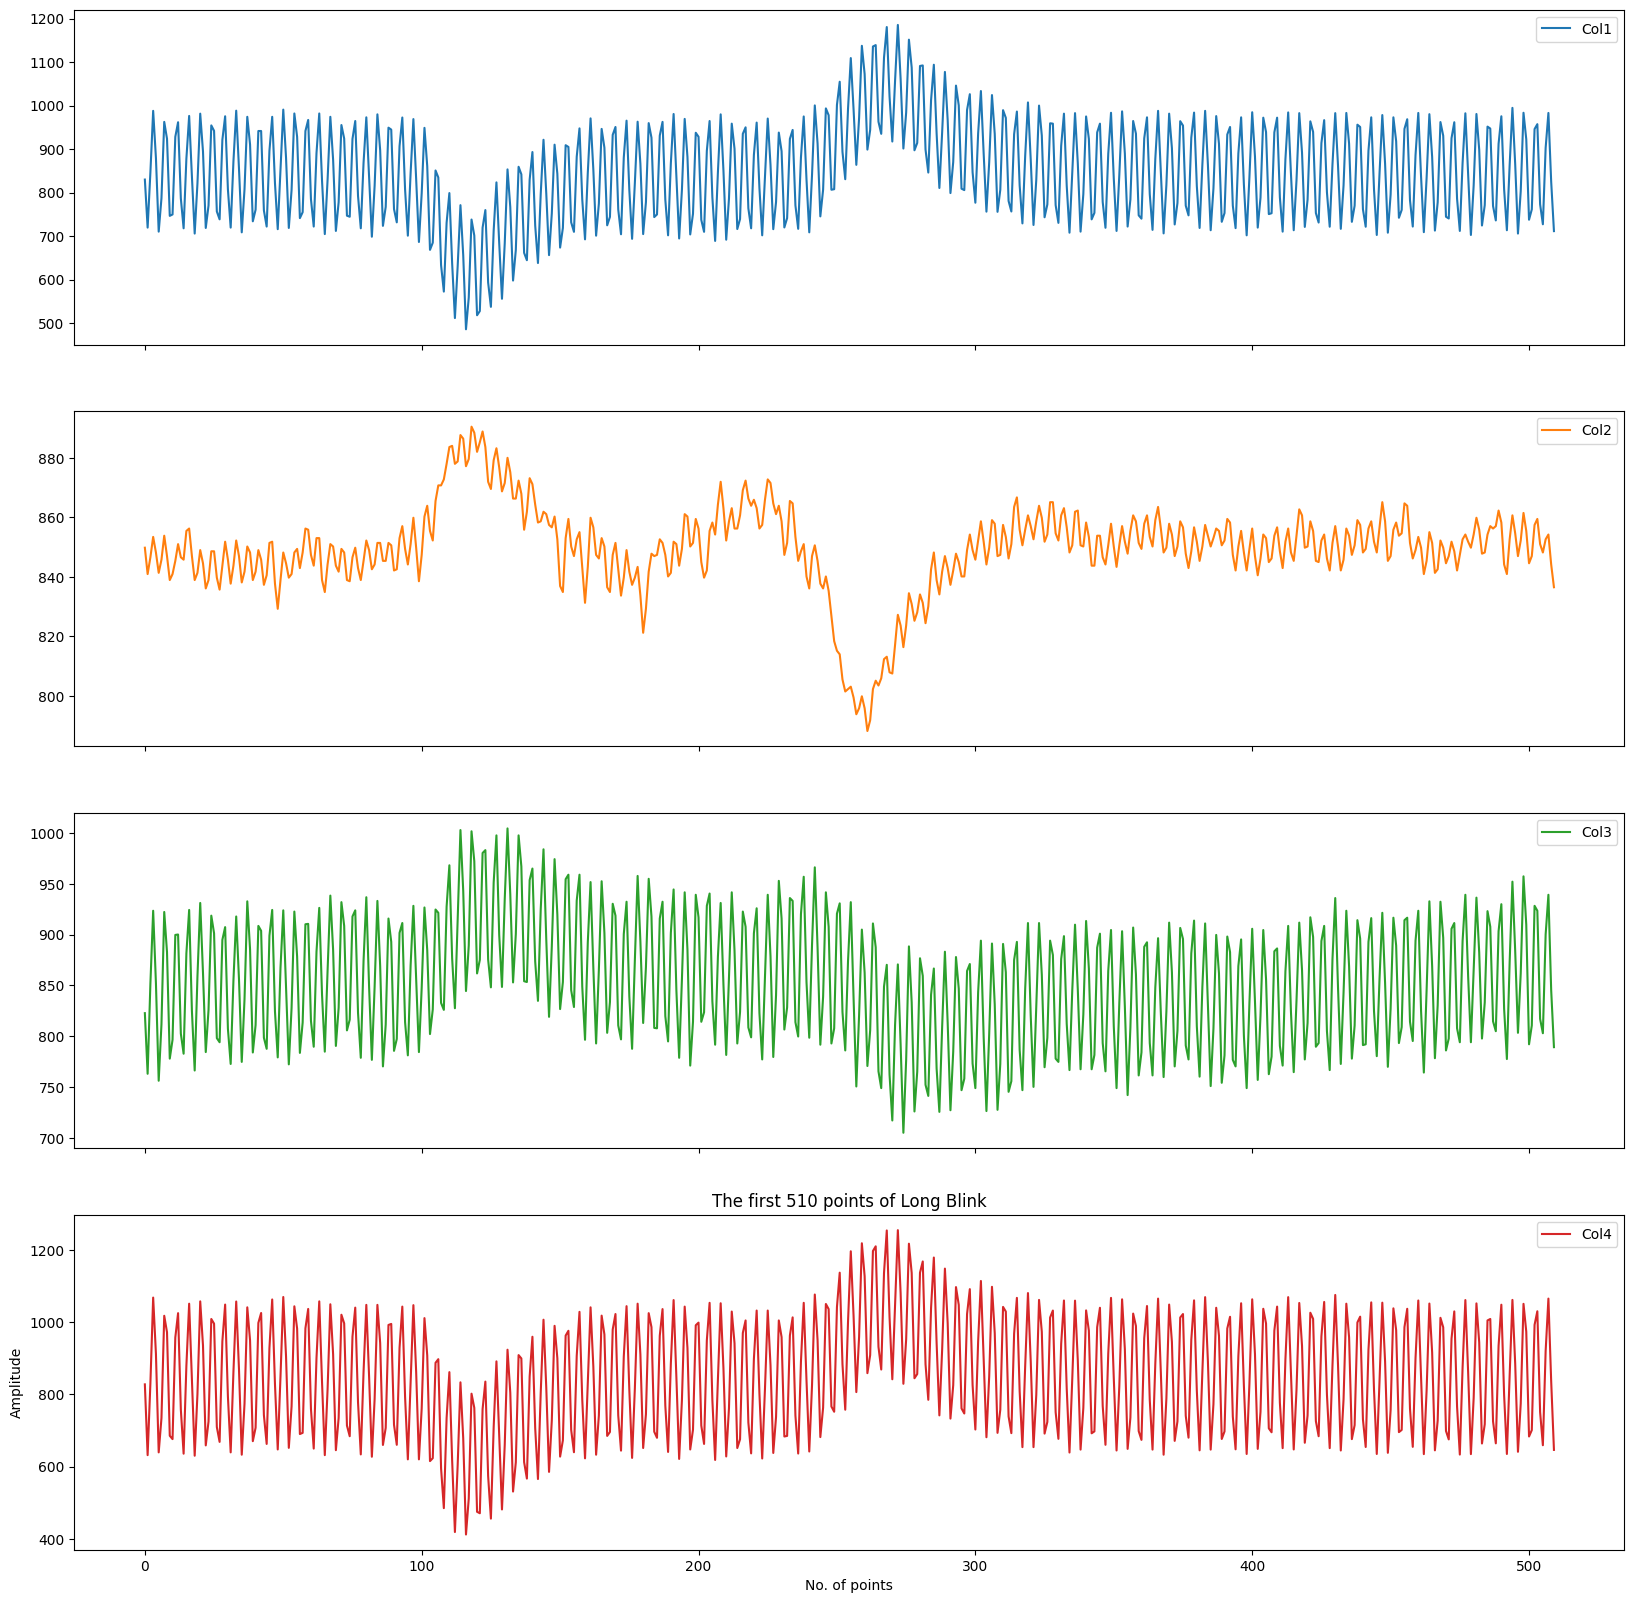

In [110]:
#Long blink data
df1 = pd.read_csv('data\\LongBlink.csv', sep = ",")
df1[['Col1', 'Col2', 'Col3', 'Col4']] = df1['data'].str.split(',', expand=True)
#Remove the original 'HeaderColumn' column
df1.drop(columns=['data'], inplace=True)
df1.head(5)
lb_ser1 = df1.iloc[:,0].str.strip('[').astype(float) #to remove square brackets and convert to float
lb_ser2 = df1.iloc[:,1].astype(float) #convert to float
lb_ser3 = df1.iloc[:,2].astype(float) #convert to float
lb_ser4 = df1.iloc[:,3].str.strip(']').astype(float) #remove square brackets and convert to float
#ser 1,2,3,4 are numpy arrays, length: 25500, dtype: float64
df1 = pd.concat([lb_ser1, lb_ser2, lb_ser3, lb_ser4], axis=1) #concatenate the columns
df1 = df1.iloc[0:510] #510 points per session 
df1.plot.line(subplots=True, figsize=(20, 20))
plt.xlabel('No. of points')
plt.ylabel('Amplitude')
plt.title('The first 510 points of Long Blink')

**Data Preprocessing**

2.1 Filtering 

source : (https://neuraldatascience.io/7-eeg/erp_filtering.html)
Filtering typically occurs at two points in the EEG pipeline:  at the time the data is recorded and during preprocessing. The filter carry out here is during preprocessing  

It is important to consider Nyquist theorem, where the highest measurable frequency is half the sampling rate. Signal frequencies higher than Nyquist frequency *alias*, thus it is necessary to filter out the components that are higher than Nyuquist frequency (source: https://link.springer.com/content/pdf/10.3758/BF03209412.pdf).  
We will be working with signal that's sampled at 215 Hz at 2 seconds long, starting with long blink data, followed by the short blink data. 

In [117]:
#band pass filter between 0.5 and 40 hz, source: https://www.kaggle.com/code/sam1o1/eeg-signal-processing
Fs = 215;              # Sampling frequency                    
T = 1/Fs;              # Sampling period       
L = 25500;             # Length of signal
t = np.arange(0,L)*T;  # Time vector (use numpy.arange to an array of evenly spaced values between 0 and L-1, multiplied by T to get the time vector)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

In [121]:
#apply the median filter function
def median(signal):# input: numpy array 1D (one column)
    array=np.array(signal)   
    #applying the median filter
    med_filtered=sp.signal.medfilt(array, kernel_size=3) # applying the median filter order3(kernel_size=3)
    return  med_filtered # return the med-filtered signal: numpy array 1D

In [122]:
#notch filter apllied at 50hz
def Implement_Notch_Filter(time, band, freq, ripple, order, filter_type, data):
    from scipy.signal import iirfilter
    fs   = 1/time
    nyq  = fs/2.0
    low  = freq - band/2.0
    high = freq + band/2.0
    low  = low/nyq
    high = high/nyq
    b, a = iirfilter(order, [low, high], rp=ripple, btype='bandstop',
                     analog=False, ftype=filter_type)
    filtered_data = lfilter(b, a, data)
    return filtered_data

In [ ]:
#code source: https://www.daanmichiels.com/blog/2017/10/filtering-eeg-signals-using-scipy/
#apply signal.firwin function : FIR (finite impulse response) filter to process the signal
#choose the cutoff frequency
cutoff_freq = [0.01, 0.06] #Hz
filter = signal.firwin(430, [0.01, 0.06], pass_zero=False)

# plt.figure(figsize=(12, 6))
# plt.plot(filter)
# plt.title("Filtered EEG Data")
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [123]:
#Create a function to apply the filters to the signal processing pipeline
def signalProcessing(): 

SyntaxError: incomplete input (3614199339.py, line 1)

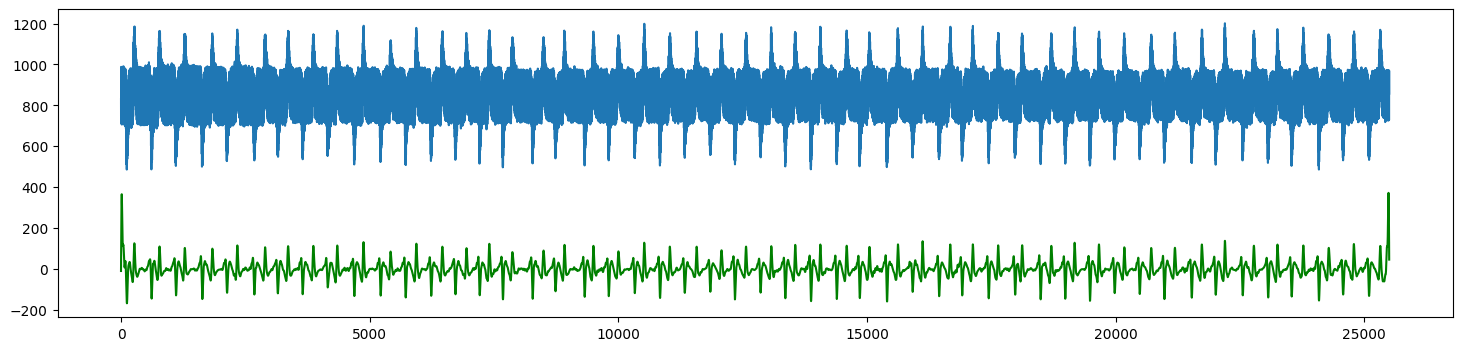

In [119]:
#FIR (finite impulse response) filter to process in series 1 and compare the results
lb1_clean = signal.convolve(lb_ser1, filter, mode='same')
plt.figure(figsize=(18,4))
plt.plot(lb_ser1, alpha=1) #alpha is for transparency
plt.plot(lb1_clean, color = "green") 
plt.show()

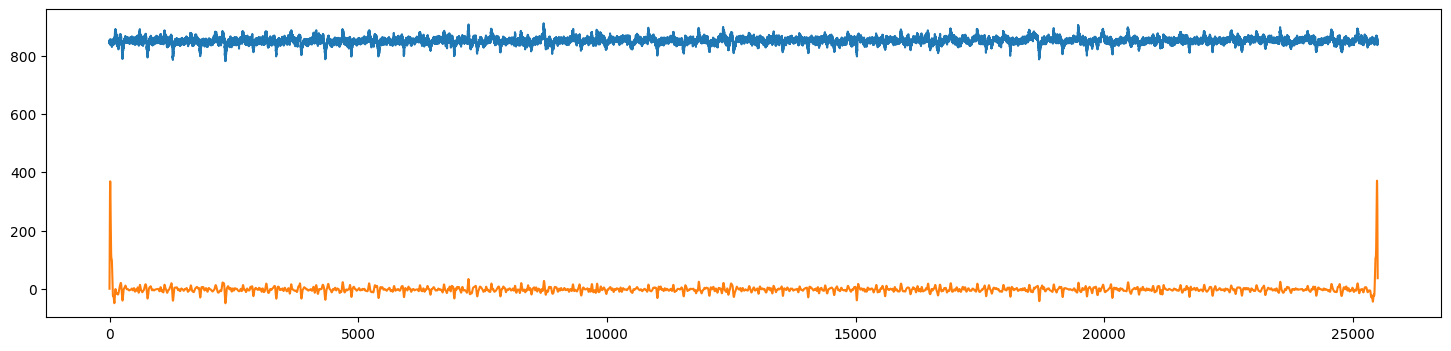

In [120]:
#FIR (finite impulse response) filter to process the first 510 points in series 2 and compare the results
lb2_clean = signal.convolve(lb_ser2, filter, mode='same')
plt.figure(figsize=(18,4))
plt.plot(lb_ser2, alpha=1) #alpha is for transparency
plt.plot(lb2_clean) 
plt.show()

In [ ]:
#FIR (finite impulse response) filter to process the first 510 points in series 3 and compare the results
lb3_clean = signal.convolve(lb_ser3, filter, mode='same')
plt.figure(figsize=(18,4))
plt.plot(lb_ser3, alpha=1) #alpha is for transparency
plt.plot(lb3_clean) 
plt.show()

In [ ]:
#FIR (finite impulse response) filter to process the first 510 points in series 4 and compare the results
lb4_clean = signal.convolve(lb_ser4, filter, mode='same')
plt.figure(figsize=(18,4))
plt.plot(lb_ser4, alpha=1) #alpha is for transparency
plt.plot(lb4_clean) 
plt.show()

In [ ]:
#Short blink
df2 = pd.read_csv('data\\ShortBlink.csv', sep = ",")
df2[['Col1', 'Col2', 'Col3', 'Col4']] = df2['data'].str.split(',', expand=True)
# Remove the original 'HeaderColumn' column
df2.drop(columns=['data'], inplace=True)
df2.head(5)
sb_ser1 = df2.iloc[:,0].str.strip('[').astype(float) #remove square brackets and convert to float
sb_ser2 = df2.iloc[:,1].astype(float) #convert to float
sb_ser3 = df2.iloc[:,2].astype(float) #convert to float
sb_ser4 = df2.iloc[:,3].str.strip(']').astype(float) #remove square brackets and convert to float
df2 = pd.concat([sb_ser1, sb_ser2, sb_ser3, sb_ser4], axis=1)
print(df2)
df2 = df2.iloc[0:510]
df2.plot.line(subplots=True, figsize=(20, 20))
df2

In [ ]:
# merged_df = pd.merge(df1, df2, how='outer', left_index=True, right_index=True)
# merged_df.plot.line(subplots=True, figsize=(20, 20))


In [ ]:
#FIR (finite impulse response) filter to process the first 510 points in series 1 and compare the results
sb1_clean = signal.convolve(sb_ser1, filter, mode='same')
plt.figure(figsize=(18,4))
plt.plot(sb_ser1, alpha=1) #alpha is for transparency
plt.plot(sb1_clean, color = "green") 
plt.show()

In [ ]:
#FIR (finite impulse response) filter to process the first 510 points in series 1 and compare the results
sb2_clean = signal.convolve(sb_ser2, filter, mode='same')
plt.figure(figsize=(18,4))
plt.plot(sb_ser2, alpha=1) #alpha is for transparency
plt.plot(sb2_clean, color = "green") 
plt.show()

In [ ]:
#FIR (finite impulse response) filter to process the first 510 points in series 1 and compare the results
sb3_clean = signal.convolve(sb_ser3, filter, mode='same')
plt.figure(figsize=(18,4))
plt.plot(sb_ser3, alpha=1) #alpha is for transparency
plt.plot(sb3_clean, color = "green") 
plt.show()

In [ ]:
#FIR (finite impulse response) filter to process the first 510 points in series 1 and compare the results
sb4_clean = signal.convolve(sb_ser4, filter, mode='same')
plt.figure(figsize=(18,4))
plt.plot(sb_ser4, alpha=1) #alpha is for transparency
plt.plot(sb4_clean, color = "green") 
plt.show()

In [ ]:
#Independent Component Analysis (ICA) for artifact removal
